In [20]:
import pycbc.noise
from pycbc.noise import noise_from_psd
import pycbc.psd
import pylab as plt
import pycbc.filter as pfliter
from pycbc.waveform import get_td_waveform
import random
import numpy as np
import cProfile

In [21]:
T = 4
flow = 30.0
delta_f = 1.0 / T
flen = int(2048 / delta_f) + 1
delta_t = 1.0 / 4096
tsamples = int(T / delta_t)

In [22]:
# PSD
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)
noisesamples = int(4 / delta_t)
SNR_array_1 = []
random_scale = 1700

22 11
wvfrm = 
l =  0  SNR =  12.031129032352064  m1 =  22  m2 =  11
10 22
wvfrm = 
l =  1  SNR =  11.287761224126886  m1 =  10  m2 =  22
25 22
wvfrm = 
l =  2  SNR =  18.294256650550402  m1 =  25  m2 =  22
18 17
wvfrm = 
l =  3  SNR =  12.951981042972964  m1 =  18  m2 =  17
12 29
wvfrm = 
l =  4  SNR =  14.681168246355815  m1 =  12  m2 =  29
10 14
wvfrm = 
l =  5  SNR =  10.854036707581706  m1 =  10  m2 =  14
27 30
wvfrm = 
l =  6  SNR =  18.891905844167233  m1 =  27  m2 =  30
11 16
wvfrm = 
l =  7  SNR =  12.07862516879216  m1 =  11  m2 =  16
17 30
wvfrm = 
l =  8  SNR =  16.96208059640368  m1 =  17  m2 =  30
15 28
wvfrm = 
l =  9  SNR =  15.577683245227949  m1 =  15  m2 =  28
15 28
wvfrm = 
l =  10  SNR =  13.794162458536574  m1 =  15  m2 =  28
18 28
wvfrm = 
l =  11  SNR =  15.989797321123527  m1 =  18  m2 =  28
29 23
wvfrm = 
l =  12  SNR =  17.15279707390761  m1 =  29  m2 =  23
16 20
wvfrm = 
l =  13  SNR =  14.232138120511715  m1 =  16  m2 =  20
20 14
wvfrm = 
l =  14  SNR =  13

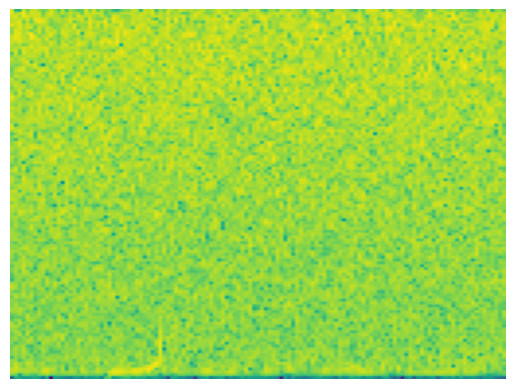

In [23]:
l = 0
while l < 100:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # rolling:

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 5000 + 6000 + 1500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_1.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+ 6000 +6500}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

10 18
wvfrm = 
l =  100  SNR =  10.465640170947026  m1 =  10  m2 =  18
26 29
wvfrm = 
l =  101  SNR =  18.998276719291905  m1 =  26  m2 =  29
11 16
wvfrm = 
l =  102  SNR =  12.51539092549439  m1 =  11  m2 =  16
22 17
wvfrm = 
l =  103  SNR =  13.152883753185368  m1 =  22  m2 =  17
13 15
wvfrm = 
l =  104  SNR =  11.357147761618103  m1 =  13  m2 =  15
21 14
wvfrm = 
l =  105  SNR =  11.859564152626982  m1 =  21  m2 =  14
24 27
wvfrm = 
l =  106  SNR =  19.956156643513236  m1 =  24  m2 =  27
27 18
wvfrm = 
l =  107  SNR =  16.13055867586192  m1 =  27  m2 =  18
29 18
wvfrm = 
l =  108  SNR =  16.866056678582936  m1 =  29  m2 =  18
27 23
wvfrm = 
l =  109  SNR =  18.711629806639547  m1 =  27  m2 =  23
22 18
wvfrm = 
l =  110  SNR =  13.94624479920528  m1 =  22  m2 =  18
24 25
wvfrm = 
l =  111  SNR =  19.238729015909676  m1 =  24  m2 =  25
19 19
wvfrm = 
l =  112  SNR =  14.19601577398366  m1 =  19  m2 =  19
27 12
wvfrm = 
l =  113  SNR =  12.344393938749002  m1 =  27  m2 =  12
16 23
wvfr

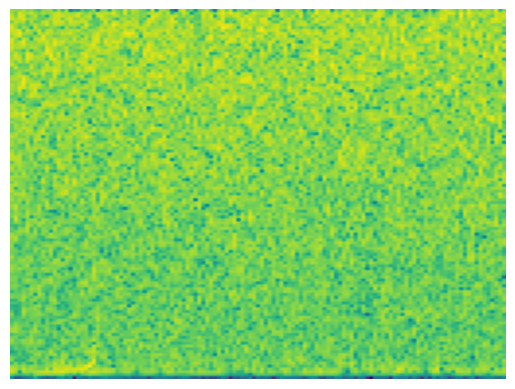

In [24]:
while l < 200:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 5000 + 6000 + 1500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_1.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+ 6000 + 6000 +6500}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

21 25
wvfrm = 
l =  200  SNR =  17.625824557007103  m1 =  21  m2 =  25
16 17
wvfrm = 
l =  201  SNR =  13.362691510450588  m1 =  16  m2 =  17
17 27
wvfrm = 
l =  202  SNR =  16.549896943176797  m1 =  17  m2 =  27
20 20
wvfrm = 
l =  203  SNR =  15.085739350856931  m1 =  20  m2 =  20
13 11
wvfrm = 
l =  204  SNR =  10.853319949847792  m1 =  13  m2 =  11
27 13
wvfrm = 
l =  205  SNR =  13.509367475867965  m1 =  27  m2 =  13
22 10
wvfrm = 
l =  206  SNR =  12.099323408207514  m1 =  22  m2 =  10
30 16
wvfrm = 
l =  207  SNR =  17.76229675745473  m1 =  30  m2 =  16
12 18
wvfrm = 
l =  208  SNR =  11.75007735296918  m1 =  12  m2 =  18
15 12
wvfrm = 
l =  209  SNR =  10.682303915763857  m1 =  15  m2 =  12
12 15
wvfrm = 
l =  210  SNR =  10.798666340441393  m1 =  12  m2 =  15
20 12
wvfrm = 
l =  211  SNR =  13.018500367373573  m1 =  20  m2 =  12
14 16
wvfrm = 
l =  212  SNR =  13.518112758080814  m1 =  14  m2 =  16
16 28
wvfrm = 
l =  213  SNR =  16.361741140847613  m1 =  16  m2 =  28
13 10
wv

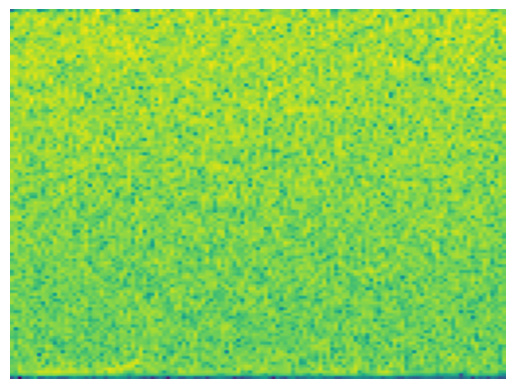

In [25]:
while l < 300:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 5000 + 6000 + 1500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_1.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+ 6000 +6500}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

18 15
wvfrm = 
l =  300  SNR =  14.239047953993373  m1 =  18  m2 =  15
10 26
wvfrm = 
l =  301  SNR =  10.833341953956847  m1 =  10  m2 =  26
20 11
wvfrm = 
l =  302  SNR =  12.648953569777369  m1 =  20  m2 =  11
13 24
wvfrm = 
l =  303  SNR =  13.309095683730696  m1 =  13  m2 =  24
18 29
wvfrm = 
l =  304  SNR =  18.241812030457687  m1 =  18  m2 =  29
21 20
wvfrm = 
l =  305  SNR =  15.59831590715416  m1 =  21  m2 =  20
24 15
wvfrm = 
l =  306  SNR =  13.486812895926528  m1 =  24  m2 =  15
28 27
wvfrm = 
l =  307  SNR =  18.888140971855883  m1 =  28  m2 =  27
25 28
wvfrm = 
l =  308  SNR =  18.377582763006856  m1 =  25  m2 =  28
12 25
wvfrm = 
l =  309  SNR =  13.413672760816013  m1 =  12  m2 =  25
27 21
wvfrm = 
l =  310  SNR =  18.07421132255934  m1 =  27  m2 =  21
20 29
wvfrm = 
l =  311  SNR =  17.63688333642558  m1 =  20  m2 =  29
23 28
wvfrm = 
l =  312  SNR =  17.482517106082206  m1 =  23  m2 =  28
23 28
wvfrm = 
l =  313  SNR =  17.290976139930894  m1 =  23  m2 =  28
30 24
wvf

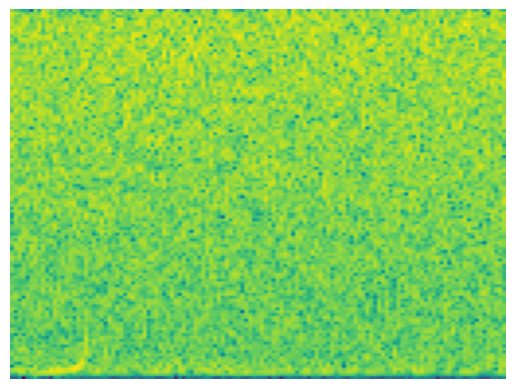

In [26]:
while l < 400:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 5000 + 6000 + 1500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    SNR_array_1.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+ 6000 +6500}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

26 28
wvfrm = 


l =  400  SNR =  19.116402331475484  m1 =  26  m2 =  28
30 28
wvfrm = 
l =  401  SNR =  20.20756979571809  m1 =  30  m2 =  28
28 24
wvfrm = 
l =  401  SNR =  20.873123340931635  m1 =  28  m2 =  24
19 18
wvfrm = 
l =  401  SNR =  15.267258136001002  m1 =  19  m2 =  18
21 14
wvfrm = 
l =  402  SNR =  12.958308810481384  m1 =  21  m2 =  14
21 23
wvfrm = 
l =  403  SNR =  18.008197171536317  m1 =  21  m2 =  23
18 29
wvfrm = 
l =  404  SNR =  16.38171841313369  m1 =  18  m2 =  29
27 21
wvfrm = 
l =  405  SNR =  18.10720838037212  m1 =  27  m2 =  21
27 10
wvfrm = 
l =  406  SNR =  10.962937245596779  m1 =  27  m2 =  10
30 12
wvfrm = 
l =  407  SNR =  13.429555602412407  m1 =  30  m2 =  12
14 21
wvfrm = 
l =  408  SNR =  14.088733457024915  m1 =  14  m2 =  21
10 19
wvfrm = 
l =  409  SNR =  11.156360308058321  m1 =  10  m2 =  19
21 26
wvfrm = 
l =  410  SNR =  16.049648036073833  m1 =  21  m2 =  26
11 14
wvfrm = 
l =  411  SNR =  10.283062279027705  m1 =  11  m2 =  14
17 18
wvfrm = 
l =  412 

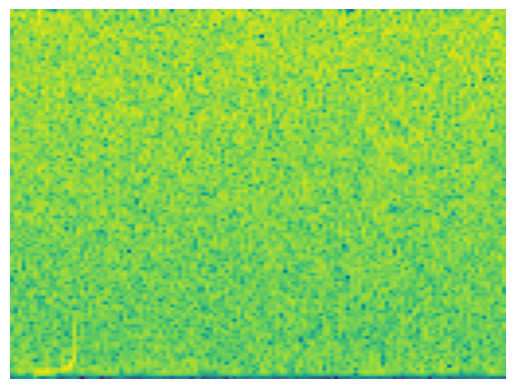

In [27]:
while l < 500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 5000 + 6000 + 1500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    SNR_array_1.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+ 6000 +6500}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

In [28]:
while l < 500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 5000 + 6000 + 1500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_1.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+ 6000 +6500}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

10 30
wvfrm = 
l =  500  SNR =  11.117784715671052  m1 =  10  m2 =  30
27 17
wvfrm = 
l =  501  SNR =  16.968246157630595  m1 =  27  m2 =  17
20 18
wvfrm = 
l =  502  SNR =  14.122142675735901  m1 =  20  m2 =  18
16 14
wvfrm = 
l =  503  SNR =  14.378084723261635  m1 =  16  m2 =  14
22 29
wvfrm = 
l =  504  SNR =  18.98683175299017  m1 =  22  m2 =  29
10 26
wvfrm = 
l =  505  SNR =  13.67717515835623  m1 =  10  m2 =  26
11 17
wvfrm = 
l =  506  SNR =  11.1142119413298  m1 =  11  m2 =  17
18 25
wvfrm = 
l =  507  SNR =  15.054464346034809  m1 =  18  m2 =  25
25 15
wvfrm = 
l =  508  SNR =  14.735111879122917  m1 =  25  m2 =  15
15 29
wvfrm = 
l =  509  SNR =  14.022511915396747  m1 =  15  m2 =  29
10 11
wvfrm = 
l =  510  SNR =  9.279397428259449  m1 =  10  m2 =  11
24 18
wvfrm = 
l =  511  SNR =  16.689310246038936  m1 =  24  m2 =  18
16 25
wvfrm = 
l =  512  SNR =  16.086713128592  m1 =  16  m2 =  25
25 17
wvfrm = 
l =  513  SNR =  16.256329366157452  m1 =  25  m2 =  17
25 20
wvfrm = 

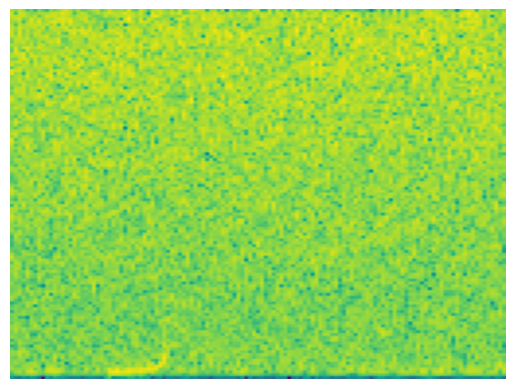

In [29]:
while l < 600:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 5000 + 6000 + 1500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_1.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+ 6000 +6500}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

25 27
wvfrm = 
l =  600  SNR =  18.795394774531115  m1 =  25  m2 =  27
17 22
wvfrm = 
l =  601  SNR =  14.419820461072714  m1 =  17  m2 =  22
21 21
wvfrm = 
l =  602  SNR =  15.692240535265013  m1 =  21  m2 =  21
11 23
wvfrm = 
l =  603  SNR =  12.61245556798369  m1 =  11  m2 =  23
15 14
wvfrm = 
l =  604  SNR =  11.091756378414969  m1 =  15  m2 =  14
30 24
wvfrm = 
l =  605  SNR =  17.71900519513637  m1 =  30  m2 =  24
20 23
wvfrm = 
l =  606  SNR =  17.468924969389633  m1 =  20  m2 =  23
21 18
wvfrm = 
l =  607  SNR =  15.898110439069553  m1 =  21  m2 =  18
11 26
wvfrm = 
l =  608  SNR =  12.52176600152061  m1 =  11  m2 =  26
10 28
wvfrm = 
l =  609  SNR =  12.259714170315434  m1 =  10  m2 =  28
29 17
wvfrm = 
l =  610  SNR =  16.623969698635218  m1 =  29  m2 =  17
14 14
wvfrm = 
l =  611  SNR =  10.631309340148976  m1 =  14  m2 =  14
21 10
wvfrm = 
l =  612  SNR =  9.095221412408165  m1 =  21  m2 =  10
29 20
wvfrm = 
l =  613  SNR =  16.55644445475981  m1 =  29  m2 =  20
17 11
wvfrm

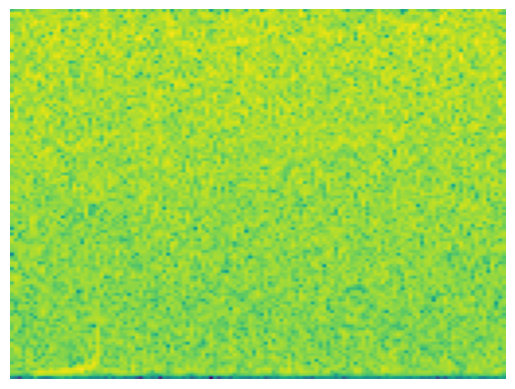

In [30]:
while l < 700:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 5000 + 6000 + 1500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_1.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+ 6000 +6500}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

26 28
wvfrm = 
l =  700  SNR =  20.58903855047485  m1 =  26  m2 =  28
20 22
wvfrm = 
l =  700  SNR =  16.545520557694164  m1 =  20  m2 =  22
20 17
wvfrm = 
l =  701  SNR =  15.139801742847256  m1 =  20  m2 =  17
10 18
wvfrm = 
l =  702  SNR =  9.599899685890499  m1 =  10  m2 =  18
26 18
wvfrm = 
l =  703  SNR =  17.23153305503134  m1 =  26  m2 =  18
26 29
wvfrm = 
l =  704  SNR =  19.296281199524962  m1 =  26  m2 =  29
30 20
wvfrm = 
l =  705  SNR =  16.797672450968108  m1 =  30  m2 =  20
27 22
wvfrm = 
l =  706  SNR =  16.61811562899859  m1 =  27  m2 =  22
12 22
wvfrm = 
l =  707  SNR =  13.01239127289203  m1 =  12  m2 =  22
19 22
wvfrm = 
l =  708  SNR =  14.56612613312972  m1 =  19  m2 =  22
23 25
wvfrm = 
l =  709  SNR =  17.530799931614123  m1 =  23  m2 =  25
18 28
wvfrm = 
l =  710  SNR =  17.75487613638476  m1 =  18  m2 =  28
26 11
wvfrm = 
l =  711  SNR =  10.34077920038575  m1 =  26  m2 =  11
12 24
wvfrm = 
l =  712  SNR =  12.370462568024422  m1 =  12  m2 =  24
21 17
wvfrm = 

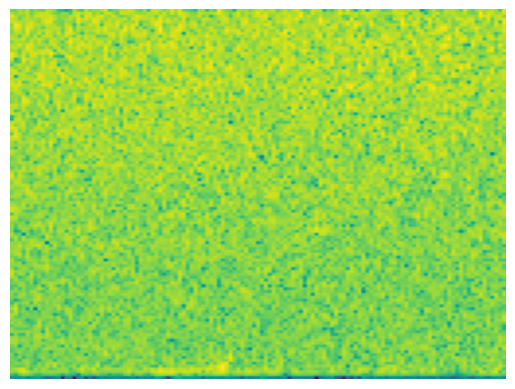

In [31]:
while l < 800:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 5000 + 6000 + 1500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_1.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+ 6000 +6500}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

29 27
wvfrm = 
l =  800  SNR =  20.530185024790335  m1 =  29  m2 =  27
19 19
wvfrm = 
l =  800  SNR =  15.79719694363691  m1 =  19  m2 =  19
15 21
wvfrm = 
l =  801  SNR =  15.147318108588474  m1 =  15  m2 =  21
18 21
wvfrm = 
l =  802  SNR =  12.955345777806702  m1 =  18  m2 =  21
30 18
wvfrm = 
l =  803  SNR =  17.701826282353068  m1 =  30  m2 =  18
22 21
wvfrm = 
l =  804  SNR =  14.868287690187897  m1 =  22  m2 =  21
14 20
wvfrm = 
l =  805  SNR =  12.891830984157563  m1 =  14  m2 =  20
19 13
wvfrm = 
l =  806  SNR =  13.524024559895299  m1 =  19  m2 =  13
29 14
wvfrm = 
l =  807  SNR =  15.70731430955482  m1 =  29  m2 =  14
20 28
wvfrm = 
l =  808  SNR =  14.687303822630405  m1 =  20  m2 =  28
29 16
wvfrm = 
l =  809  SNR =  17.21833525682862  m1 =  29  m2 =  16
27 18
wvfrm = 
l =  810  SNR =  17.851273349693866  m1 =  27  m2 =  18
19 10
wvfrm = 
l =  811  SNR =  11.558803483093985  m1 =  19  m2 =  10
26 15
wvfrm = 
l =  812  SNR =  14.114553914874094  m1 =  26  m2 =  15
12 21
wvf

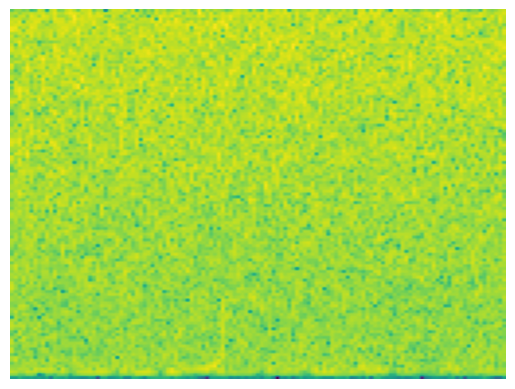

In [32]:
while l < 900:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 5000 + 6000 + 1500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_1.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+ 6000 +6500}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

23 26
wvfrm = 


l =  900  SNR =  18.705942544440017  m1 =  23  m2 =  26
16 24
wvfrm = 
l =  901  SNR =  16.61317450676048  m1 =  16  m2 =  24
28 15
wvfrm = 
l =  902  SNR =  13.863341831650366  m1 =  28  m2 =  15
14 26
wvfrm = 
l =  903  SNR =  11.538394097780207  m1 =  14  m2 =  26
22 28
wvfrm = 
l =  904  SNR =  18.071529950178256  m1 =  22  m2 =  28
29 11
wvfrm = 
l =  905  SNR =  14.310276962361707  m1 =  29  m2 =  11
16 19
wvfrm = 
l =  906  SNR =  16.174075680458035  m1 =  16  m2 =  19
30 16
wvfrm = 
l =  907  SNR =  14.917115789322636  m1 =  30  m2 =  16
29 18
wvfrm = 
l =  908  SNR =  17.21326834469018  m1 =  29  m2 =  18
24 16
wvfrm = 
l =  909  SNR =  14.296593531477006  m1 =  24  m2 =  16
23 17
wvfrm = 
l =  910  SNR =  15.700564929894371  m1 =  23  m2 =  17
22 14
wvfrm = 
l =  911  SNR =  15.175555938342042  m1 =  22  m2 =  14
12 28
wvfrm = 
l =  912  SNR =  13.01429160441005  m1 =  12  m2 =  28
30 18
wvfrm = 
l =  913  SNR =  15.647522413220564  m1 =  30  m2 =  18
16 28
wvfrm = 
l =  914 

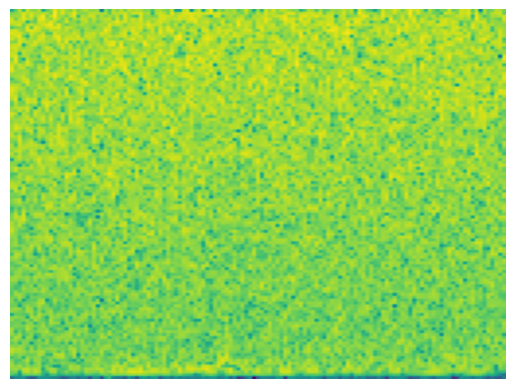

In [33]:
while l < 1000:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 5000 + 6000 + 1500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_1.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+ 6000 +6500}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

24 16
wvfrm = 
l =  1000  SNR =  13.750135702470441  m1 =  24  m2 =  16
24 13
wvfrm = 
l =  1001  SNR =  12.806573043984754  m1 =  24  m2 =  13
28 23
wvfrm = 
l =  1002  SNR =  19.714672308675556  m1 =  28  m2 =  23
23 19
wvfrm = 
l =  1003  SNR =  16.275084995334367  m1 =  23  m2 =  19
20 20
wvfrm = 
l =  1004  SNR =  16.492592588261385  m1 =  20  m2 =  20
21 10
wvfrm = 
l =  1005  SNR =  12.014351055864557  m1 =  21  m2 =  10
17 14
wvfrm = 
l =  1006  SNR =  13.181233635926157  m1 =  17  m2 =  14
13 27
wvfrm = 
l =  1007  SNR =  14.778659880866934  m1 =  13  m2 =  27
13 12
wvfrm = 
l =  1008  SNR =  10.512264298325675  m1 =  13  m2 =  12
29 20
wvfrm = 
l =  1009  SNR =  16.97705767830677  m1 =  29  m2 =  20
30 13
wvfrm = 
l =  1010  SNR =  15.603266312962221  m1 =  30  m2 =  13
24 10
wvfrm = 
l =  1011  SNR =  10.933338110878896  m1 =  24  m2 =  10
16 28
wvfrm = 
l =  1012  SNR =  16.573694631484464  m1 =  16  m2 =  28
27 26
wvfrm = 
l =  1013  SNR =  18.79125065595348  m1 =  27  m2 

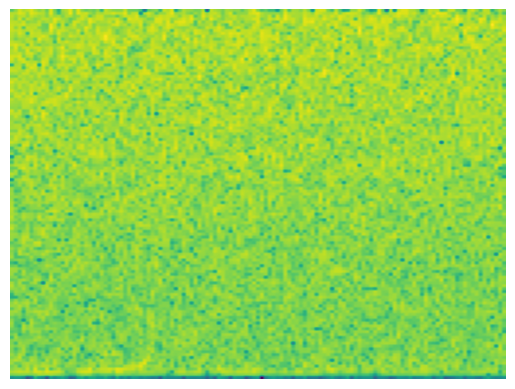

In [34]:
while l < 1100:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 5000 + 6000 + 1500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_1.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+ 6000 +6500}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

19 18
wvfrm = 
l =  1100  SNR =  14.29539385299731  m1 =  19  m2 =  18
18 27
wvfrm = 
l =  1101  SNR =  15.798148809043116  m1 =  18  m2 =  27
28 26
wvfrm = 
l =  1102  SNR =  19.52735442665425  m1 =  28  m2 =  26
22 10
wvfrm = 
l =  1103  SNR =  11.9599193783463  m1 =  22  m2 =  10
25 13
wvfrm = 
l =  1104  SNR =  13.158326886415956  m1 =  25  m2 =  13
22 13
wvfrm = 
l =  1105  SNR =  12.412557089408152  m1 =  22  m2 =  13
26 21
wvfrm = 
l =  1106  SNR =  17.589098833408073  m1 =  26  m2 =  21
19 26
wvfrm = 
l =  1107  SNR =  14.840672591063248  m1 =  19  m2 =  26
22 15
wvfrm = 
l =  1108  SNR =  13.043667806932637  m1 =  22  m2 =  15
29 26
wvfrm = 
l =  1109  SNR =  18.308127107253227  m1 =  29  m2 =  26
22 18
wvfrm = 
l =  1110  SNR =  14.30534894209302  m1 =  22  m2 =  18
17 14
wvfrm = 
l =  1111  SNR =  10.606136821569965  m1 =  17  m2 =  14
20 14
wvfrm = 
l =  1112  SNR =  12.493915048707803  m1 =  20  m2 =  14
10 12
wvfrm = 
l =  1113  SNR =  8.467946219806315  m1 =  10  m2 =  1

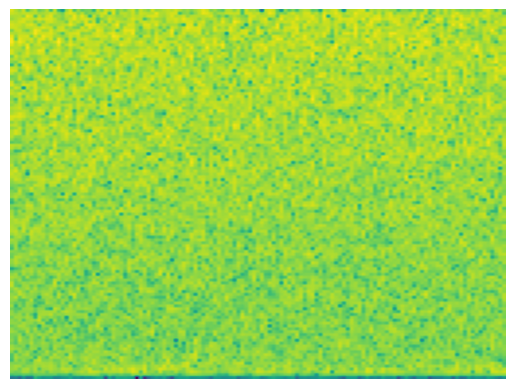

In [35]:
while l < 1200:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 5000 + 6000 + 1500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_1.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+ 6000 +6500}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

14 21
wvfrm = 
l =  1200  SNR =  12.197218061941042  m1 =  14  m2 =  21
18 19
wvfrm = 
l =  1201  SNR =  14.929010771384432  m1 =  18  m2 =  19
28 15
wvfrm = 
l =  1202  SNR =  15.679114063401476  m1 =  28  m2 =  15
29 26
wvfrm = 
l =  1203  SNR =  19.065997042882415  m1 =  29  m2 =  26
18 29
wvfrm = 
l =  1204  SNR =  16.46166473500787  m1 =  18  m2 =  29
10 13
wvfrm = 
l =  1205  SNR =  10.829506261778274  m1 =  10  m2 =  13
15 15
wvfrm = 
l =  1206  SNR =  12.421834552226523  m1 =  15  m2 =  15
25 21
wvfrm = 
l =  1207  SNR =  16.29141738941475  m1 =  25  m2 =  21
30 23
wvfrm = 
l =  1208  SNR =  18.545901711659145  m1 =  30  m2 =  23
16 13
wvfrm = 
l =  1209  SNR =  11.97315983802375  m1 =  16  m2 =  13
19 29
wvfrm = 
l =  1210  SNR =  19.824683297808306  m1 =  19  m2 =  29
18 17
wvfrm = 
l =  1211  SNR =  14.357822516872368  m1 =  18  m2 =  17
11 20
wvfrm = 
l =  1212  SNR =  10.418485532949525  m1 =  11  m2 =  20
29 30
wvfrm = 
l =  1213  SNR =  19.969684032992824  m1 =  29  m2 =

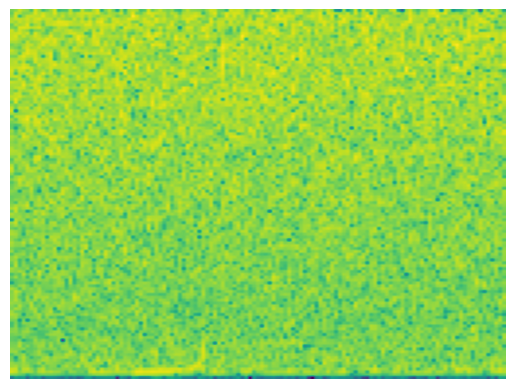

In [36]:
while l < 1300:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 5000 + 6000 + 1500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_1.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+ 6000 +6500}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

29 14
wvfrm = 
l =  1300  SNR =  13.031201393544322  m1 =  29  m2 =  14
13 15
wvfrm = 
l =  1301  SNR =  10.858652248899569  m1 =  13  m2 =  15
15 25
wvfrm = 
l =  1302  SNR =  13.806702326128443  m1 =  15  m2 =  25
28 12
wvfrm = 
l =  1303  SNR =  13.65191561912276  m1 =  28  m2 =  12
18 30
wvfrm = 
l =  1304  SNR =  18.20242435151555  m1 =  18  m2 =  30
11 12
wvfrm = 
l =  1305  SNR =  12.383071627983936  m1 =  11  m2 =  12
13 25
wvfrm = 
l =  1306  SNR =  13.930127533250499  m1 =  13  m2 =  25
11 24
wvfrm = 
l =  1307  SNR =  11.8048559959404  m1 =  11  m2 =  24
10 23
wvfrm = 
l =  1308  SNR =  11.523363522592463  m1 =  10  m2 =  23
19 25
wvfrm = 
l =  1309  SNR =  15.463317242423555  m1 =  19  m2 =  25
24 26
wvfrm = 
l =  1310  SNR =  17.64145584456519  m1 =  24  m2 =  26
10 17
wvfrm = 
l =  1311  SNR =  11.422633263713312  m1 =  10  m2 =  17
10 23
wvfrm = 
l =  1312  SNR =  12.260076126285892  m1 =  10  m2 =  23
12 29
wvfrm = 
l =  1313  SNR =  13.066152374850803  m1 =  12  m2 =  

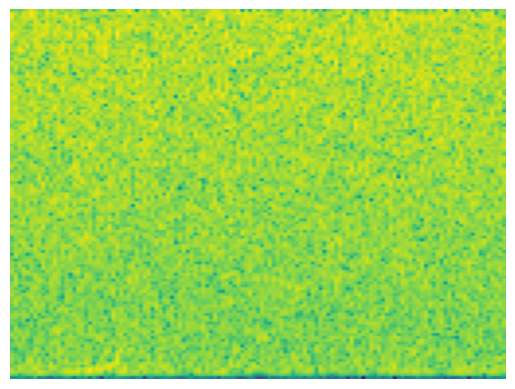

In [37]:
while l < 1400:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 5000 + 6000 + 1500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_1.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+ 6000 +6500}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

23 17
wvfrm = 
l =  1400  SNR =  15.196331572264054  m1 =  23  m2 =  17
24 20
wvfrm = 
l =  1401  SNR =  17.071439387190015  m1 =  24  m2 =  20
18 12
wvfrm = 
l =  1402  SNR =  12.189902942596675  m1 =  18  m2 =  12
13 20
wvfrm = 
l =  1403  SNR =  12.82676534906429  m1 =  13  m2 =  20
10 22
wvfrm = 
l =  1404  SNR =  10.103917831118299  m1 =  10  m2 =  22
11 12
wvfrm = 
l =  1405  SNR =  10.03567857438432  m1 =  11  m2 =  12
19 14
wvfrm = 
l =  1406  SNR =  12.806024778095617  m1 =  19  m2 =  14
30 19
wvfrm = 
l =  1407  SNR =  16.081824894681972  m1 =  30  m2 =  19
20 26
wvfrm = 
l =  1408  SNR =  15.319488418020265  m1 =  20  m2 =  26
22 28
wvfrm = 
l =  1409  SNR =  17.404172745356643  m1 =  22  m2 =  28
16 30
wvfrm = 
l =  1410  SNR =  15.731001170147536  m1 =  16  m2 =  30
27 19
wvfrm = 
l =  1411  SNR =  16.631038842469014  m1 =  27  m2 =  19
11 15
wvfrm = 
l =  1412  SNR =  10.788108133832528  m1 =  11  m2 =  15
12 24
wvfrm = 
l =  1413  SNR =  12.92698311218893  m1 =  12  m2 =

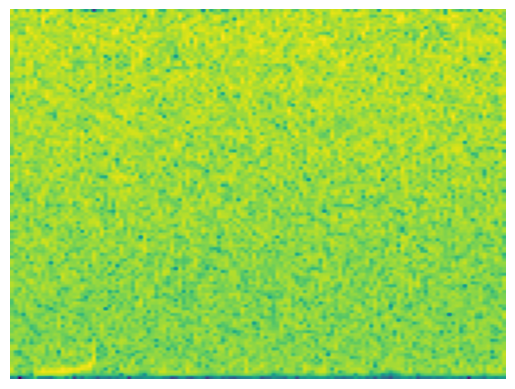

In [38]:
while l < 1500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 5000 + 6000 + 1500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_1.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+ 6000 +6500}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

wavform generate random mass
scale wvfrm
add to noise
calc snr
make spectrograms
classify into folders
